# Exercise 1: Distance-Only Sensor

In [1]:
import numpy as np
from scipy import stats
import math
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

In [2]:
%matplotlib notebook

In [3]:
uni = np.array([10.0, 8.0])
hme = np.array([6.0, 3.0])

c1 = np.array([12.0, 4.0])
c2 = np.array([5.0, 7.0])

s1 = math.sqrt(1.0)
s2 = math.sqrt(1.5)

d0 = 3.9
d1 = 4.5
measurement = [d0, d1]

In [4]:
def sensor_distance_model(x):
    
    d1_hat = np.linalg.norm(c1 - x)
    d2_hat = np.linalg.norm(c2 - x)
    diff1 = abs(d1_hat - measurement[0])
    diff2 = abs(d2_hat - measurement[1])
    
    prob1 = stats.norm(scale = s1).pdf(diff1)
    prob2 = stats.norm(scale = s2).pdf(diff2)
    
    return prob1 * prob2

In [5]:
print('Likelihood of being at university:' , sensor_distance_model(uni))
print('Likelihood of being at home:' , sensor_distance_model(hme))

Likelihood of being at university: 0.09789228652717097
Likelihood of being at home: 0.011445192088352306


a) So more likely to be at university

b)

In [6]:
# 3d plot of likelihood p(x|m) overall location m in vicinity of the towers

def sensor_model(X,Y):
    Z = np.zeros_like(X)
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            Z[i,j] = sensor_distance_model(np.array([X[i,j], Y[i,j]],dtype=np.float))
    return Z

x = np.arange(3.0, 15.0, 0.5)
y = np.arange(-5.0, 15.0, 0.5)
X, Y = np.meshgrid(x, y)
Z = sensor_model(X, Y)


<IPython.core.display.Javascript object>


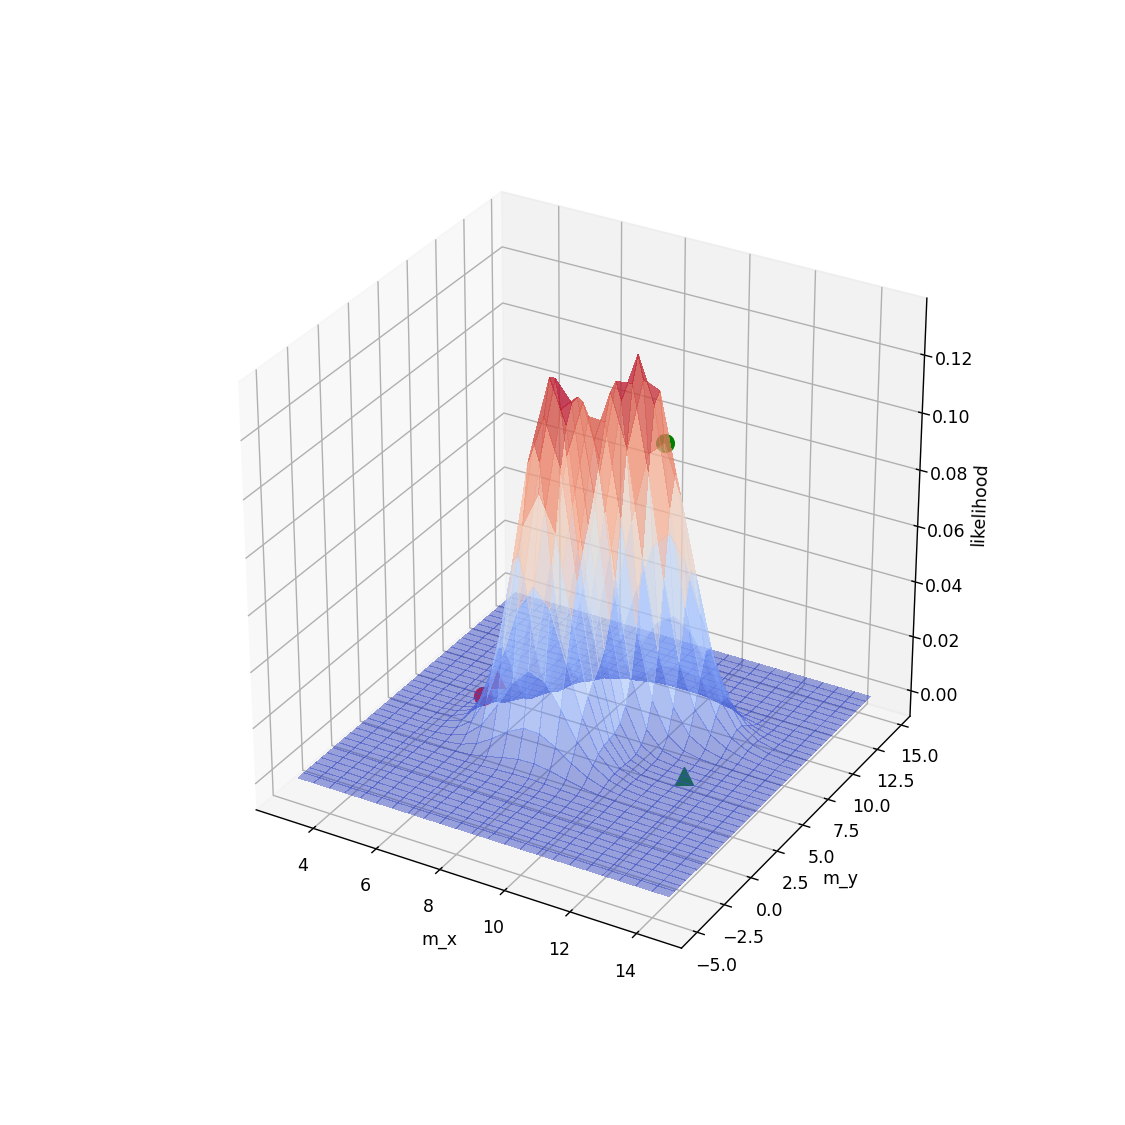

In [7]:
fig = plt.figure(figsize=(9,9))
ax = fig.gca(projection='3d')
ax.set_xlabel('m_x')
ax.set_ylabel('m_y')
ax.set_zlabel('likelihood')
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, antialiased=False, rstride=1, cstride=1, alpha=0.5)

ax.scatter(uni[0], uni[1], sensor_distance_model(uni) , c='g', marker='o', s=100)
ax.scatter(hme[0], hme[1], sensor_distance_model(hme) , c='r', marker='o', s=100)
ax.scatter(c1[0], c1[1], sensor_distance_model(c1) , c='g', marker='^', s=100)
ax.scatter(c2[0], c2[1], sensor_distance_model(c2) , c='r', marker='^', s=100)
plt.show()

c)

In [8]:
# bel at home
prior_home = 0.7
prior_uni = 0.3

bel_at_home = sensor_distance_model(hme) * prior_home 
bel_at_uni = sensor_distance_model(uni) * prior_uni 

normalizer = bel_at_home + bel_at_uni

bel_at_home = bel_at_home / normalizer
bel_at_uni = bel_at_uni / normalizer

print("at home", bel_at_home)
print("at uni", bel_at_uni)

at home 0.21433333650336767
at uni 0.7856666634966323
